#### Description
The device's tracking data consists of 67 entries, each containing weight-related metrics. The dataset includes eight columns:

- **Id**: Unique identifier of each record.
- **Date**: Date of the weight data.
- **WeightKg**: User's weight in kilograms.
- **WeightPounds**: User's weight in pounds.
- **Fat**: Amount of body fat (only 2 non-null values in this column).
- **BMI**: Body Mass Index, a numeric value derived from weight and height.
- **IsManualReport**: Boolean indicating whether the report was entered manually.
- **LogId**: Identifier associated with each record.

The data columns contain both numerical and categorical data types. The 'Date' column is of object type, likely representing the date in a string format. The dataset has some missing values, particularly in the 'Fat' column. The memory usage of the dataset is relatively low at 3.9+ KB.

This data can potentially offer insights into the relationship between weight metrics and other health-related factors for users utilizing the devices tracking features.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

%matplotlib inline

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [13]:
df_weight_log_info_merged = pd.read_csv('../data/weightLogInfo_merged.csv')

In [14]:
df_weight_log_info_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [15]:
df_weight_log_info_merged.shape

(67, 8)

In [16]:
df_weight_log_info_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [17]:
df_weight_log_info_merged['Date'] = pd.to_datetime(df_weight_log_info_merged['Date'])

C:\Users\jer93\AppData\Local\Temp\ipykernel_21652\454881494.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weight_log_info_merged['Date'] = pd.to_datetime(df_weight_log_info_merged['Date'])


In [18]:
df_weight_log_info_merged.describe()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,2016-04-27 15:39:54.283582208,72.035821,158.811801,23.50000,25.185224,1.461772e+12
min,1.503960e+09,2016-04-12 06:47:11,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,2016-04-19 15:19:45,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,2016-04-27 23:59:59,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,2016-05-04 15:24:10.500000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,2016-05-12 23:59:59,133.500000,294.317120,25.00000,47.540001,1.463098e+12
std,1.950322e+09,NaN,13.923206,30.695415,2.12132,3.066963,7.829948e+08


#### Summary Statistics Analysis

The summary statistics of the dataset reveal interesting insights about the various metrics:

- **WeightKg**: The weight of users ranges from a minimum of approximately 52.60 kg to a maximum of 133.50 kg. The average weight is about 72.04 kg, with a standard deviation of 13.92 kg. This indicates a relatively wide distribution of weights among the users.

- **WeightPounds**: The weight of users in pounds has a minimum of around 115.96 pounds and a maximum of 294.32 pounds. The mean weight in pounds, approximately 158.81, aligns with the mean weight in kilograms.

- **Fat**: The 'Fat' column has only 2 non-null values, making it difficult to draw meaningful conclusions from the summary statistics for this column.

- **BMI (Body Mass Index)**: The BMI values range from a minimum of 21.45 to a maximum of 47.54. The average BMI is about 25.19, with a standard deviation of 3.07. The variation in BMI suggests diversity in the users' body compositions.

These summary statistics provide a glimpse into the diversity and range of the dataset's metrics. It's worth noting that the range of BMI values indicates variability in users' body compositions, which reinforces the limitations of using BMI as a sole indicator of health due to its failure to consider factors like muscle mass and fat distribution.

Overall, these statistics highlight the heterogeneity of the user population and emphasize the importance of considering multiple factors when assessing health and fitness.

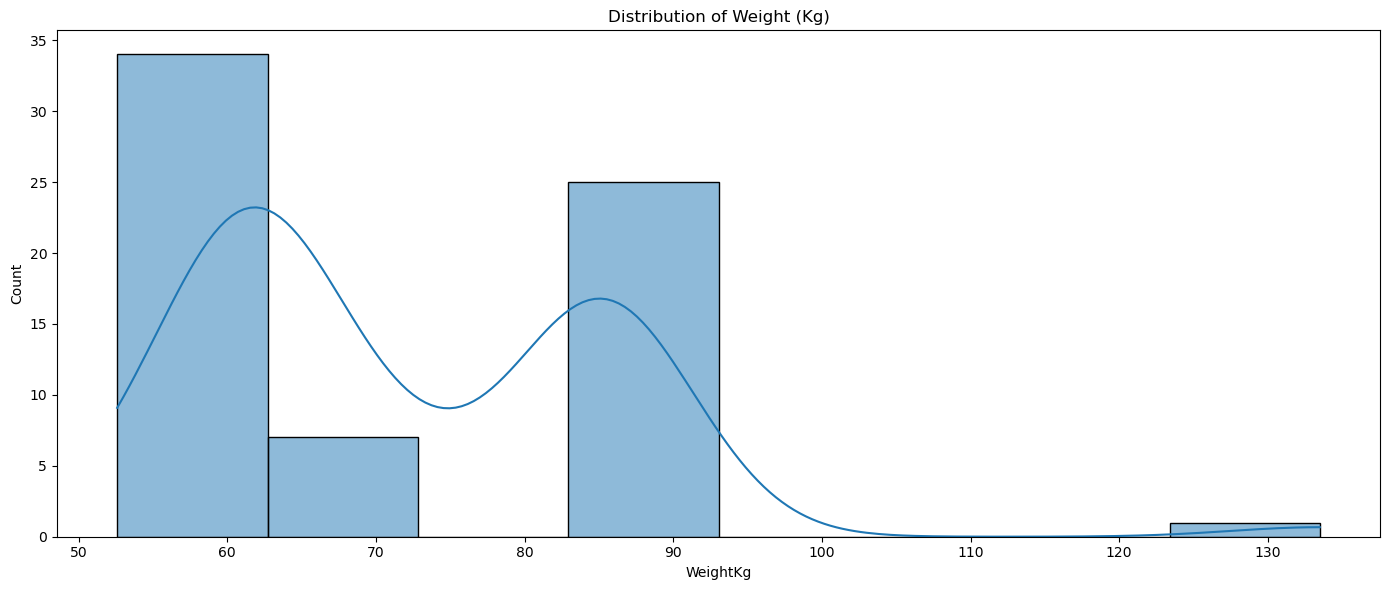

In [19]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df_weight_log_info_merged, x='WeightKg', kde=True)
plt.title('Distribution of Weight (Kg)')

plt.tight_layout()
plt.show()

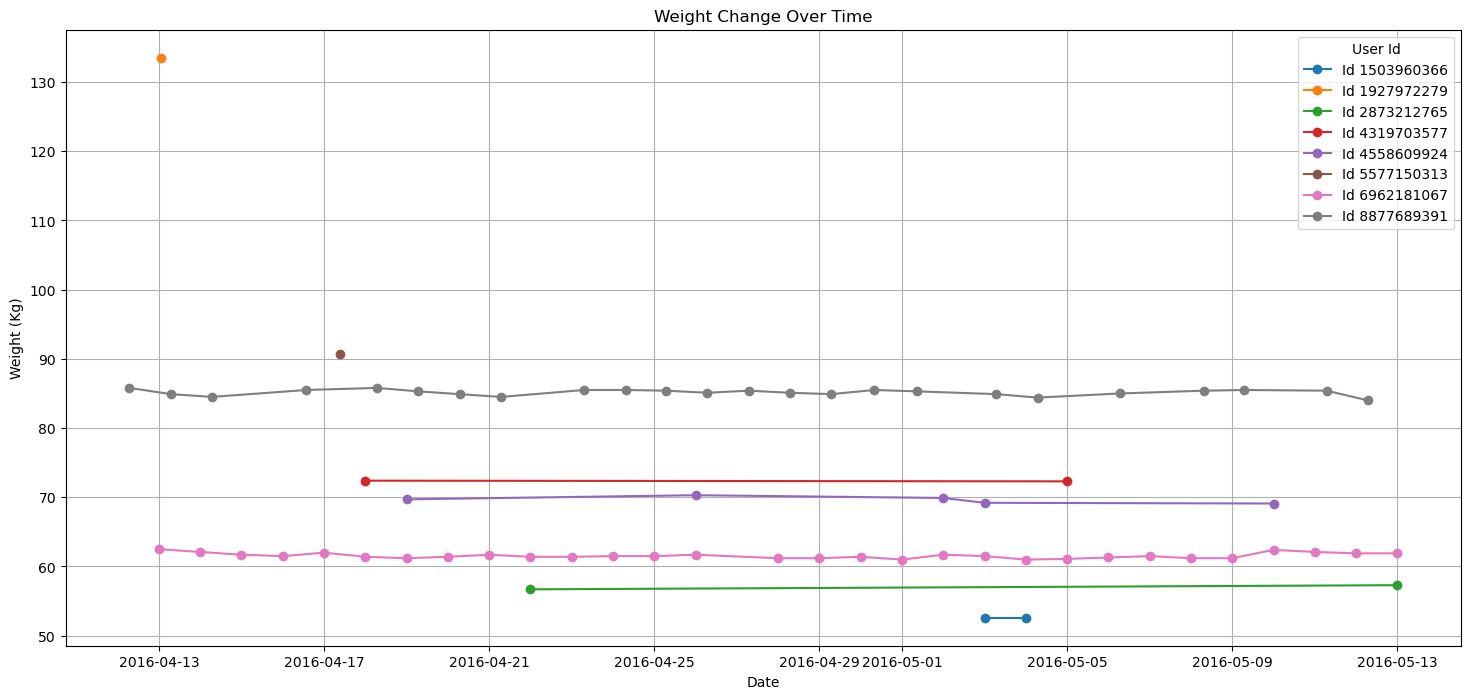

In [22]:
# Ensure the data is sorted by Id and Date
df_weight_log_info_merged = df_weight_log_info_merged.sort_values(by=['Id', 'Date'])

# Plot weight change over time for each Id
unique_ids = df_weight_log_info_merged['Id'].unique()
plt.figure(figsize=(18, 8))

for id in unique_ids:
    user_data = df_weight_log_info_merged[df_weight_log_info_merged['Id'] == id]
    plt.plot(user_data['Date'], user_data['WeightKg'], marker='o', label=f'Id {id}')

plt.title('Weight Change Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.legend(title='User Id')
plt.grid(True)
plt.show()

### Analysis of Weight Change Over Time

The chart shows that only a few users tracked their weight consistently over 30 days.

### Encouragement for Healthy Weight Loss

To encourage healthy weight loss among users, consider implementing the following in fitness tracking devices and apps:

1. **Goal Setting**:
   - Enable realistic weight loss goals with progress tracking.

2. **Behavioral Reminders**:
   - Send motivational messages and tips for healthy habits.

3. **Social Support**:
   - Facilitate community support and achievement sharing.

4. **Educational Content**:
   - Provide in-app resources on nutrition and exercise.

5. **Positive Reinforcement**:
   - Reward consistency and milestones with badges or incentives.

These strategies can help users stay motivated and achieve healthy weight loss.